Missing Values:
{'Customers': CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64, 'Products': ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64, 'Transactions': TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64}

Duplicates:
{'Customers': 0, 'Products': 0, 'Transactions': 0}


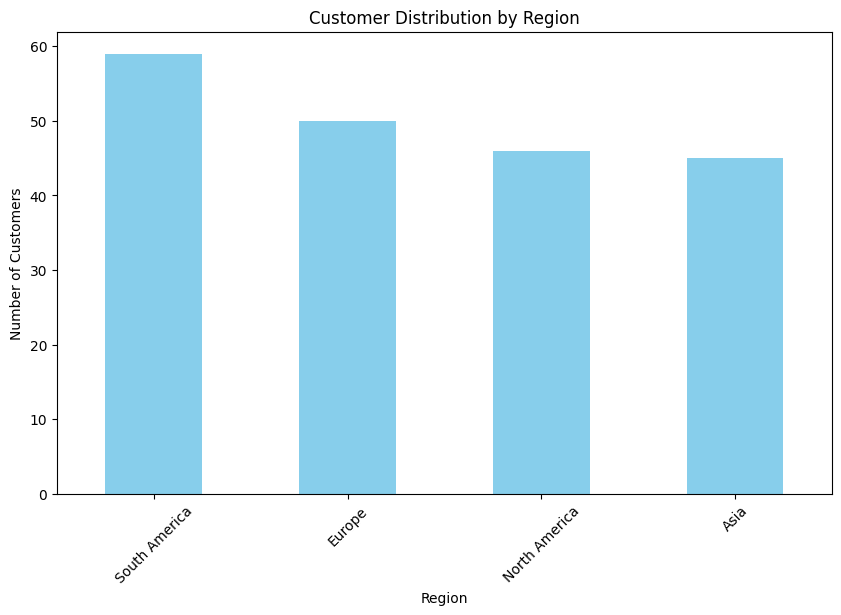

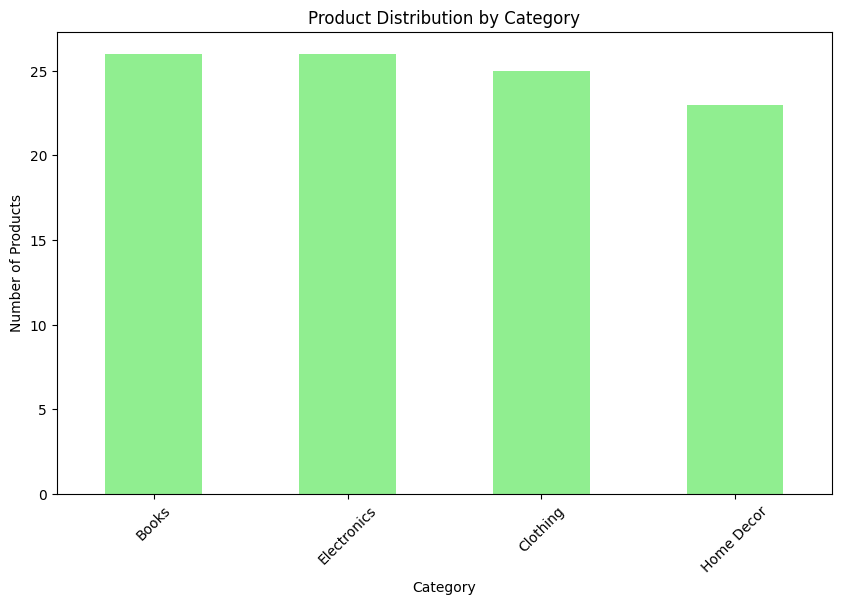

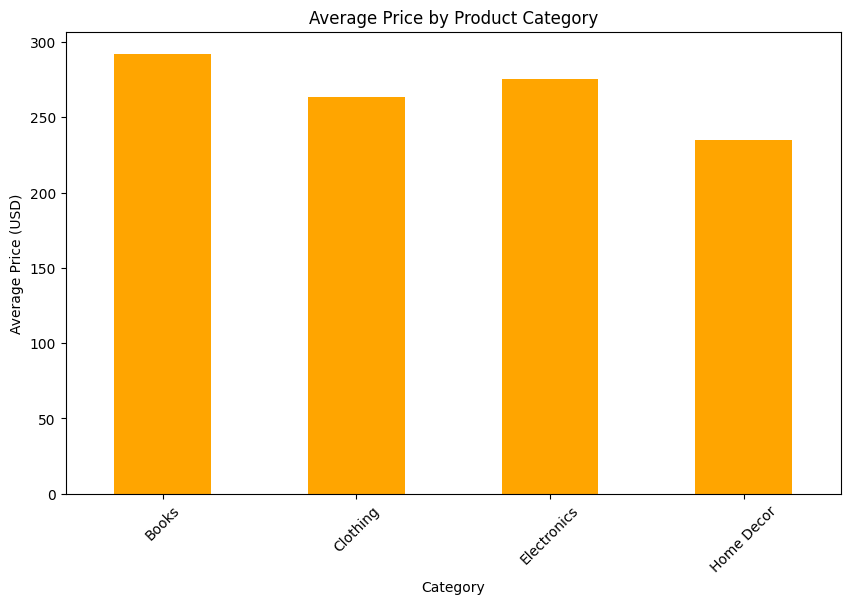

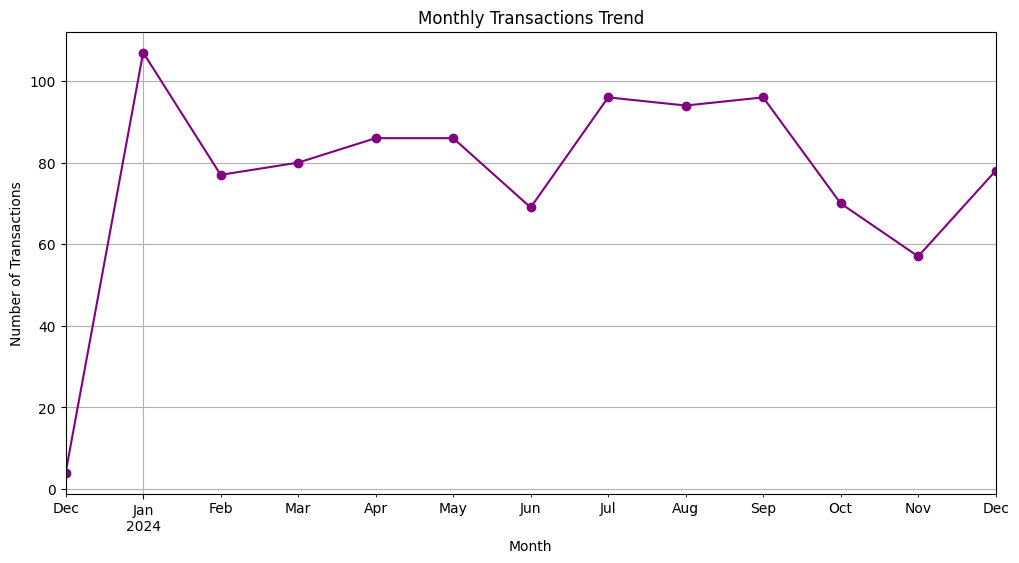

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Initial Checks
# Check for missing values
missing_values = {
    "Customers": customers.isnull().sum(),
    "Products": products.isnull().sum(),
    "Transactions": transactions.isnull().sum()
}

# Check for duplicates
duplicates = {
    "Customers": customers.duplicated().sum(),
    "Products": products.duplicated().sum(),
    "Transactions": transactions.duplicated().sum()
}

# Print summary
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

# If no issues, proceed with EDA

# 1. Customer Distribution by Region
customer_region_dist = customers['Region'].value_counts()

# Plot Customer Distribution
plt.figure(figsize=(10, 6))
customer_region_dist.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 2. Product Categories and Price Distribution
product_category_dist = products['Category'].value_counts()
avg_price_by_category = products.groupby('Category')['Price'].mean()

# Plot Product Category Distribution
plt.figure(figsize=(10, 6))
product_category_dist.plot(kind='bar', color='lightgreen')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Plot Average Price by Category
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title('Average Price by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

# 3. Transaction Patterns (Sales Trends)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_transactions = transactions.groupby('Month').size()

# Plot Monthly Transactions
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Transactions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


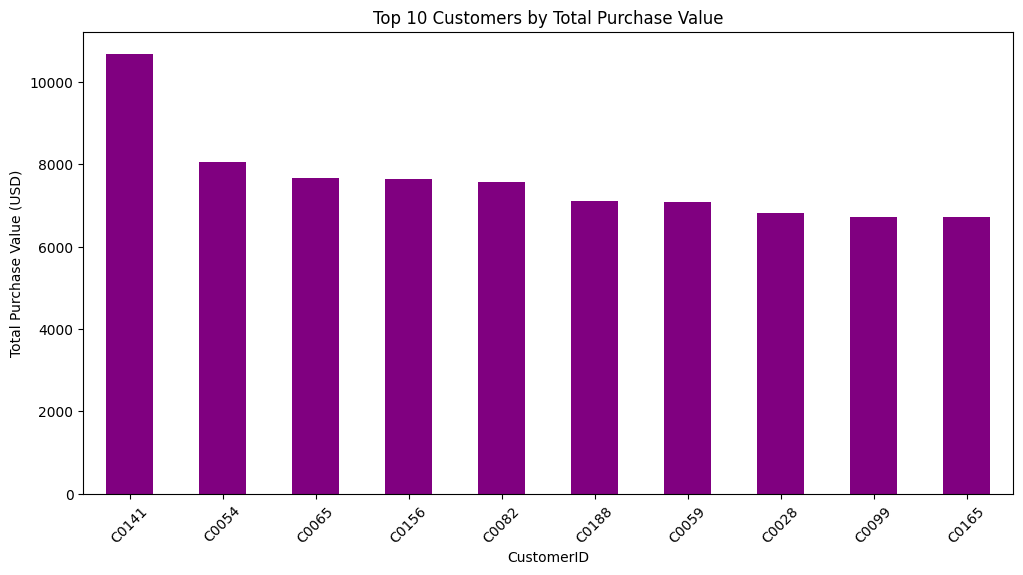

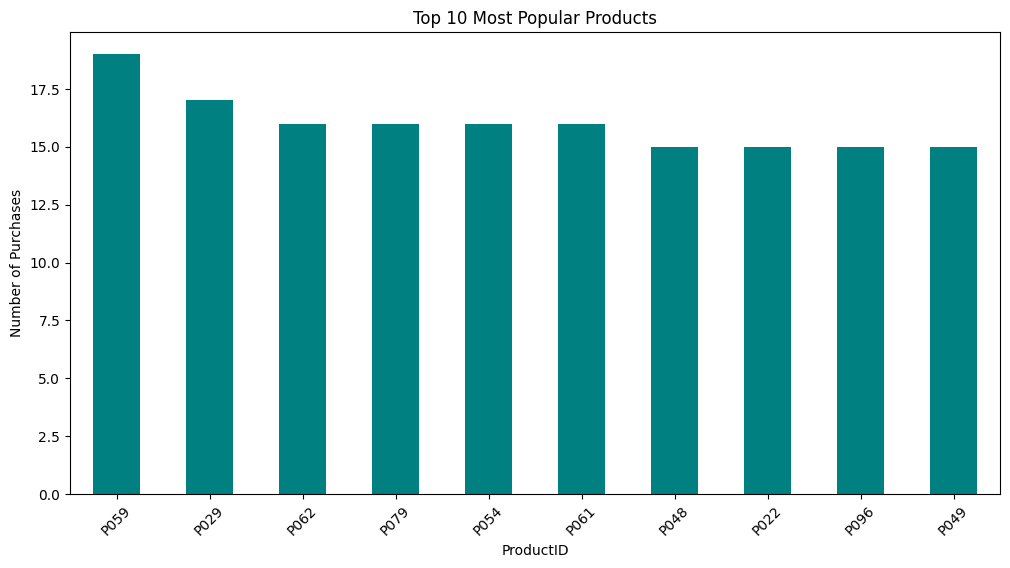

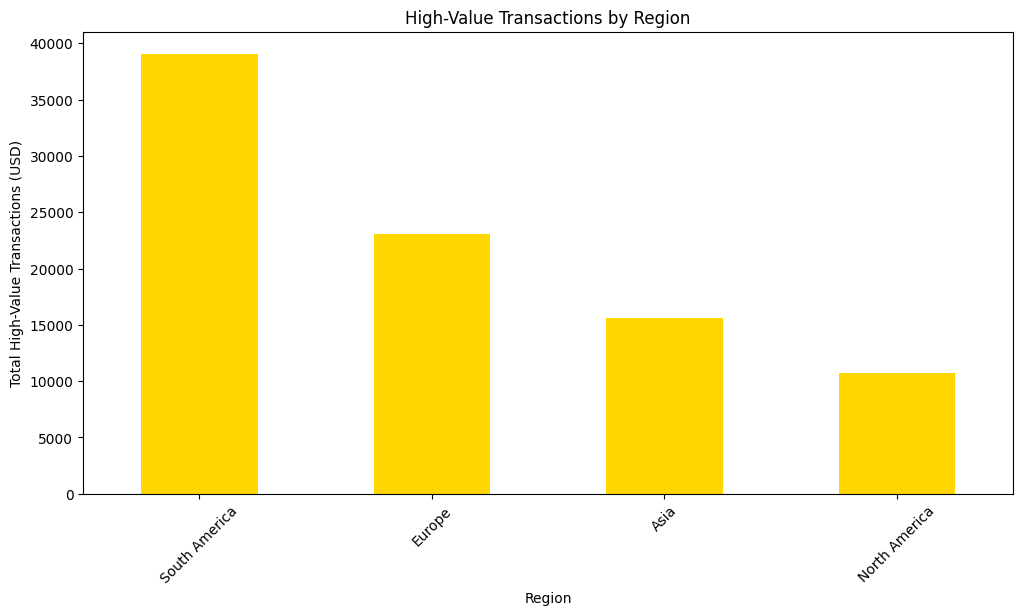

In [2]:
# High-Value Transactions Analysis
high_value_threshold = transactions['TotalValue'].quantile(0.95)  # Top 5% of transactions by value
high_value_transactions = transactions[transactions['TotalValue'] >= high_value_threshold]

# Top Customers by Total Purchase Value
customer_purchase_value = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Most Popular Products
popular_products = transactions['ProductID'].value_counts().head(10)

# Merging for Customer-Product Insights
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Top regions contributing to high-value transactions
high_value_regions = (
    merged_data[merged_data['TotalValue'] >= high_value_threshold]
    .groupby('Region')['TotalValue']
    .sum()
    .sort_values(ascending=False)
)

# Visualizing High-Value Insights

# Plot 1: Top Customers by Purchase Value
plt.figure(figsize=(12, 6))
customer_purchase_value.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Total Purchase Value')
plt.xlabel('CustomerID')
plt.ylabel('Total Purchase Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Most Popular Products
plt.figure(figsize=(12, 6))
popular_products.plot(kind='bar', color='teal')
plt.title('Top 10 Most Popular Products')
plt.xlabel('ProductID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Plot 3: High-Value Transactions by Region
plt.figure(figsize=(12, 6))
high_value_regions.plot(kind='bar', color='gold')
plt.title('High-Value Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Total High-Value Transactions (USD)')
plt.xticks(rotation=45)
plt.show()
